## Import Packages

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('../../data/job_data.csv')

## Summary Statistics

The first step of EDA is to alway look at the structure of our dataframe, and key statistics of both numerical and categorical variables. Our dataset on jobs is one which has several types of data, which is why there is a breadth of exploratory data analysis that can be conducted on this particular dataset. Summary statistics are an important aspect of exploratory data analysis because they provide a concise and comprehensive summary of the key features and characteristics of our data set. By calculating summary statistics, we can quickly gain insights into the central tendency, variability, and distribution of the data.

In [15]:
df.shape

(823, 17)

In [16]:
df.head()

,Unnamed: 0,title,company_name,location,via,description,schedule_type,salary,query,qualifications,responsibilities,benefits,degree,experience,remote,city,state
0,0,Ethereum Blockchain Developer (Remote),Ex Populus,Anywhere,Built In,Company Overview:\nEx Populus is a cutting-edg...,Full-time,NaN,Blockchain,['2-3 years of Software Development experience...,"['Design, maintain and deploy smart contracts ...",NaN,NaN,2.5,True,NaN,NaN
1,1,Blockchain Engineer,21.co,"New York, NY",Greenhouse,We are seeking a highly motivated and skilled ...,Full-time,180000.0,Blockchain,"[""Bachelor's or Master's degree in Computer Sc...","['As a Blockchain Engineer, you will be respon...",['(NYC only) Pursuant to Section 8-102 of titl...,Master's,NaN,False,New York,New York
2,2,Blockchain Course Instructor,Blockchain Institute of Technology,Anywhere,LinkedIn,"Are you a blockchain, cryptocurrency, NFT, Met...",Contractor,NaN,Blockchain,"['3+ years of experience in blockchain, crypto...",['Our expert technical team will provide the s...,NaN,NaN,3.0,True,NaN,NaN
3,3,Python based - Blockchain developer to join ex...,Upwork,Anywhere,Upwork,Need someone to join our existing team to spee...,Contractor,41600.0,Blockchain,"['Candidates must be willing to sign, non-disc...",['Will discuss details with the selected candi...,NaN,NaN,NaN,True,NaN,NaN
4,4,Blockchain DevOps Engineer (Remote),Telnyx,United States,Startup Jobs,"About Telnyx\n\nAt Telnyx, we’re architecting ...",Full-time,NaN,Blockchain,['You are a highly motivated and experienced B...,['To build a best-in-class Filecoin (FIL) Mini...,NaN,Bachelor's,NaN,True,NaN,NaN


In [17]:
df.dtypes

Unnamed: 0            int64
title                object
company_name         object
location             object
via                  object
description          object
schedule_type        object
salary              float64
query                object
qualifications       object
responsibilities     object
benefits             object
degree               object
experience          float64
remote                 bool
city                 object
state                object
dtype: object

In [18]:
df['experience'].describe()

count    387.000000
mean       4.680879
std        2.908509
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       20.000000
Name: experience, dtype: float64

In [19]:
df['salary'].describe()

count       332.000000
mean     143013.671687
std       61496.830081
min       22070.000000
25%      107925.000000
50%      148887.500000
75%      180412.500000
max      400000.000000
Name: salary, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        823 non-null    int64  
 1   title             823 non-null    object 
 2   company_name      823 non-null    object 
 3   location          823 non-null    object 
 4   via               823 non-null    object 
 5   description       823 non-null    object 
 6   schedule_type     822 non-null    object 
 7   salary            332 non-null    float64
 8   query             823 non-null    object 
 9   qualifications    823 non-null    object 
 10  responsibilities  718 non-null    object 
 11  benefits          423 non-null    object 
 12  degree            536 non-null    object 
 13  experience        387 non-null    float64
 14  remote            823 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(11)
memory usage: 90.9+ KB


In [17]:
(df.isnull().sum()/(len(df)))*100 # percent of missing data

Unnamed: 0           0.000000
title                0.000000
company_name         0.000000
location             0.000000
via                  0.000000
description          0.000000
schedule_type        0.121507
salary              59.659781
query                0.000000
qualifications       0.000000
responsibilities    12.758202
benefits            48.602673
degree              34.872418
experience          52.976914
remote               0.000000
dtype: float64

In [18]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['title', 'company_name', 'location', 'via', 'description',
       'schedule_type', 'query', 'qualifications', 'responsibilities',
       'benefits', 'degree'],
      dtype='object')
Numerical Variables:
['Unnamed: 0', 'salary', 'experience']


## Univariate and Bivariate Analysis

Another important piece of EDA is to explore the raw data visually, either by means of Univariate or Bivariate analysis. Univariate analysis entails viewing the distribution and features of one variable. It helps us understand the distribution of a single variable, such as the frequency of each value or the range of values in our data. Bivariate analysis, on the other hand, relates to plotting the relationship between two variables. It helps us understand the relationship between two variables, such as correlation or association. Bivariate plots such as scatter plots, line plots, and heatmaps can be used to identify patterns, trends, and dependencies in the data.

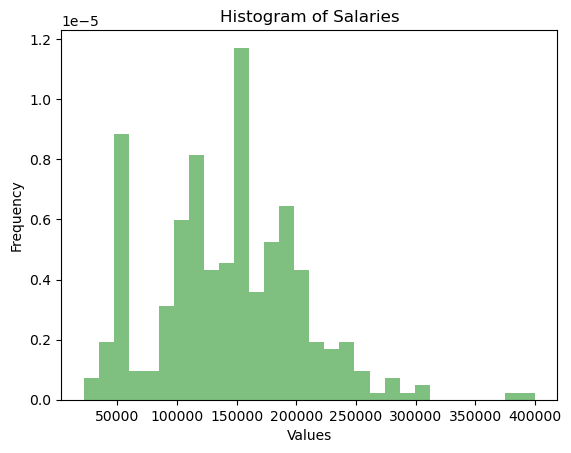

In [21]:
# create a histogram of the data
plt.hist(df['salary'], bins=30, density=True, alpha=0.5, color='green')

plt.title('Histogram of Salaries')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

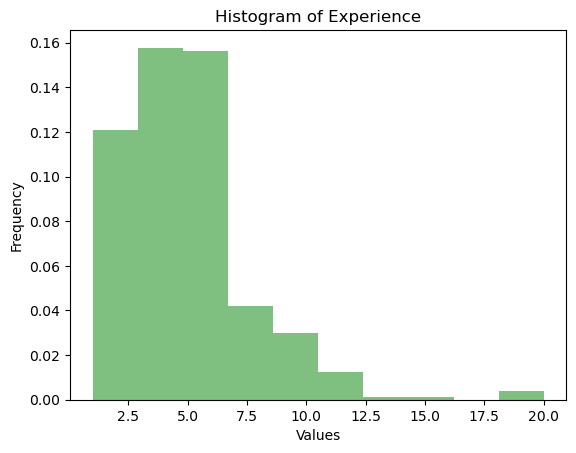

In [24]:
# create a histogram of the data
plt.hist(df['experience'], density=True, alpha=0.5, color='green')

plt.title('Histogram of Experience')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

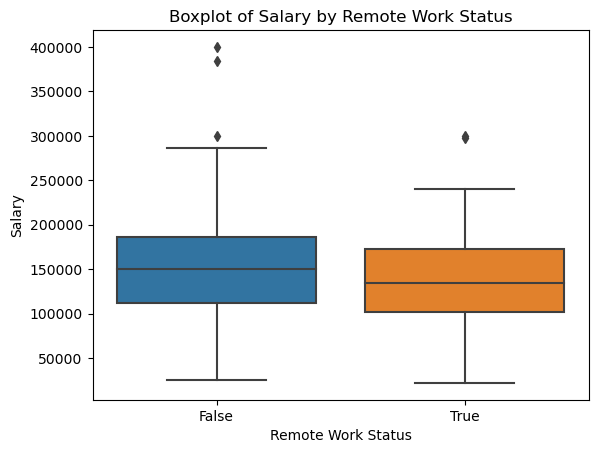

In [26]:
sns.boxplot(x='remote', y='salary', data=df)

plt.title('Boxplot of Salary by Remote Work Status')
plt.xlabel('Remote Work Status')
plt.ylabel('Salary')

plt.show()

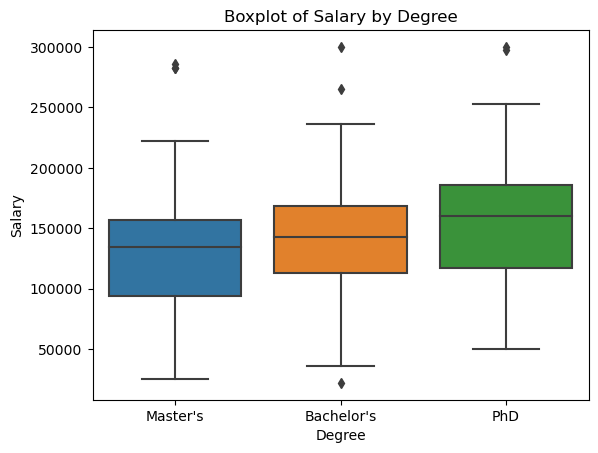

In [42]:
sns.boxplot(x='degree', y='salary', data=df)

plt.title('Boxplot of Salary by Degree')
plt.xlabel('Degree')
plt.ylabel('Salary')

plt.show()

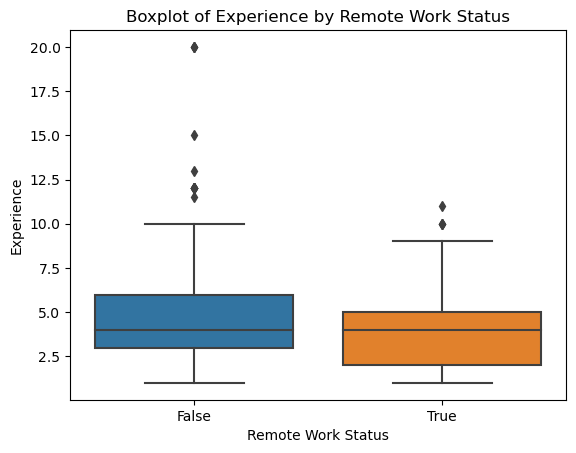

In [27]:
sns.boxplot(x='remote', y='experience', data=df)

plt.title('Boxplot of Experience by Remote Work Status')
plt.xlabel('Remote Work Status')
plt.ylabel('Experience')

plt.show()

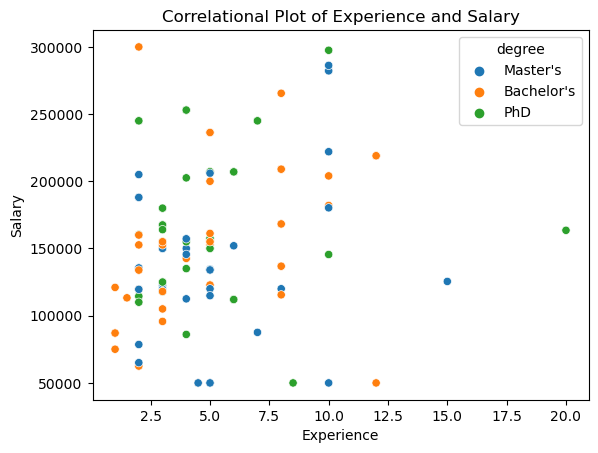

In [29]:
sns.scatterplot(x='experience', y='salary', hue = 'degree', data=df)

plt.title('Correlational Plot of Experience and Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')

plt.show()

<AxesSubplot: xlabel='degree', ylabel='count'>

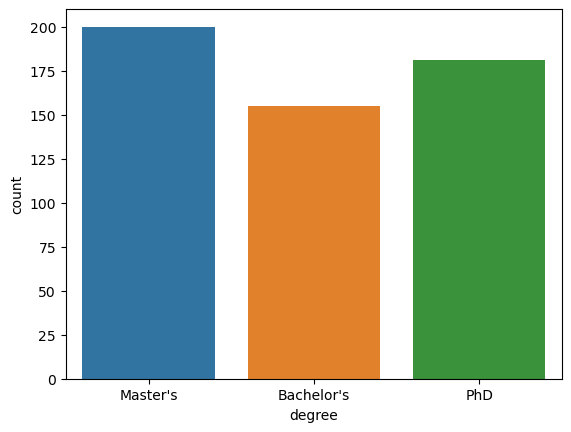

In [30]:
sns.countplot(data = df, x = 'degree')

<AxesSubplot: xlabel='remote', ylabel='count'>

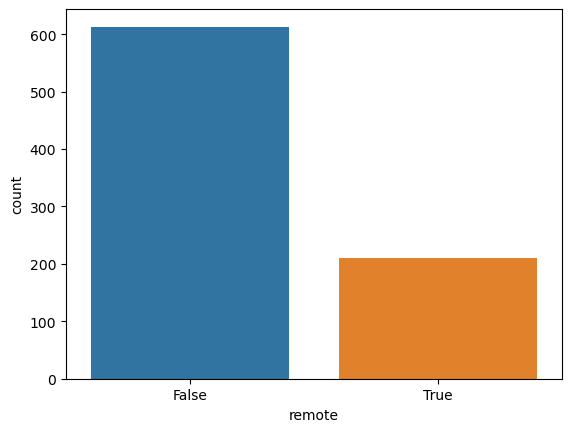

In [33]:
sns.countplot(data = df, x = 'remote')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'blockchain'),
  Text(1, 0, 'natural language processing'),
  Text(2, 0, 'big data and cloud computing'),
  Text(3, 0, 'data analyst'),
  Text(4, 0, 'machine learning'),
  Text(5, 0, 'reinforcement learning'),
  Text(6, 0, 'neural networks'),
  Text(7, 0, 'deep learning'),
  Text(8, 0, 'data scientist'),
  Text(9, 0, 'time series'),
  Text(10, 0, 'time series analysis')])

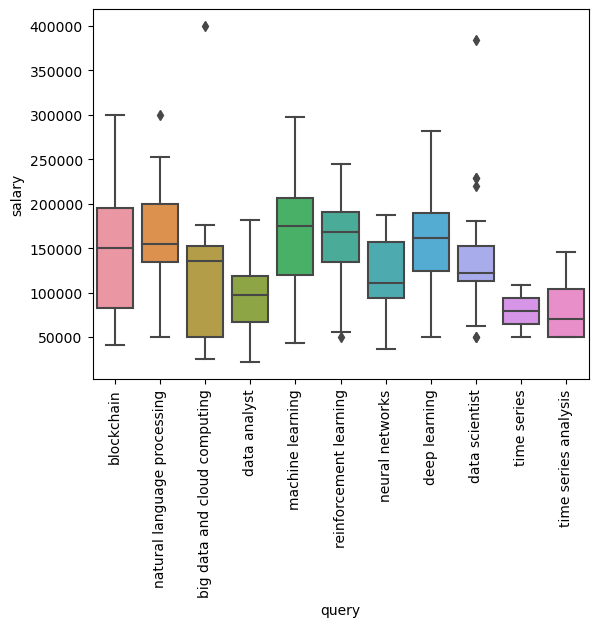

In [35]:
sns.boxplot(data = df, x='query', y='salary')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'blockchain'),
  Text(1, 0, 'natural language processing'),
  Text(2, 0, 'big data and cloud computing'),
  Text(3, 0, 'data analyst'),
  Text(4, 0, 'machine learning'),
  Text(5, 0, 'reinforcement learning'),
  Text(6, 0, 'neural networks'),
  Text(7, 0, 'deep learning'),
  Text(8, 0, 'data scientist'),
  Text(9, 0, 'time series'),
  Text(10, 0, 'time series analysis')])

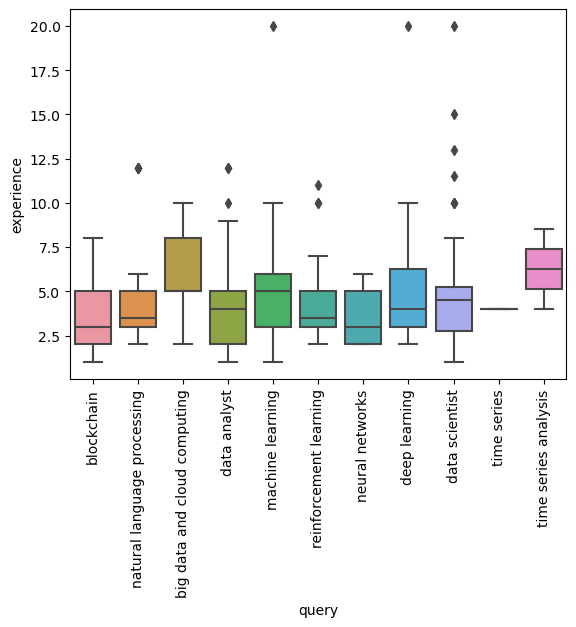

In [36]:
sns.boxplot(data = df, x='query', y='experience')
plt.xticks(rotation=90)


In [40]:
df['company_name'].value_counts().head(10)

Upwork                 56
Booz Allen Hamilton    17
Apple                  15
Deloitte               10
Walmart                 9
Jobot                   8
Snap Inc.               8
Lockheed Martin         7
Microsoft               7
Leidos                  7
Name: company_name, dtype: int64

In [41]:
df['via'].value_counts().head(10)

LinkedIn          66
ZipRecruiter      60
Upwork            56
AngelList         36
Lever             23
Greenhouse        19
Clearance Jobs    19
Startup Jobs      16
Built In          15
Salary.com        14
Name: via, dtype: int64

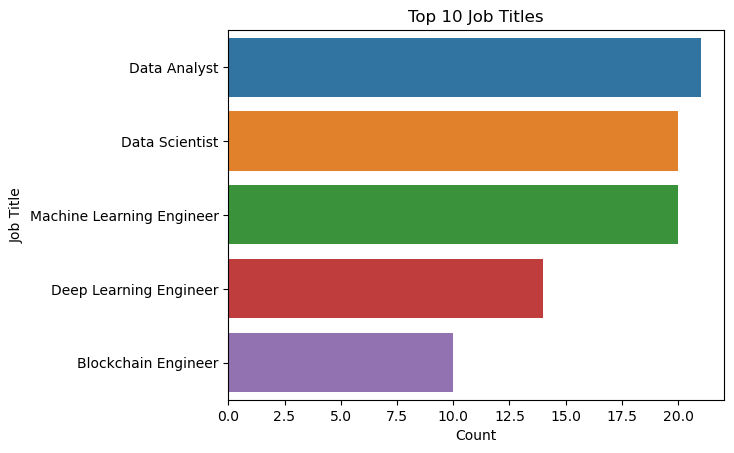

In [49]:
# get the top 10 most frequent job titles
top_5_titles = df['title'].value_counts().head(5)

# create a bar plot of the job title counts
sns.barplot(x=top_5_titles, y=top_5_titles.index)
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

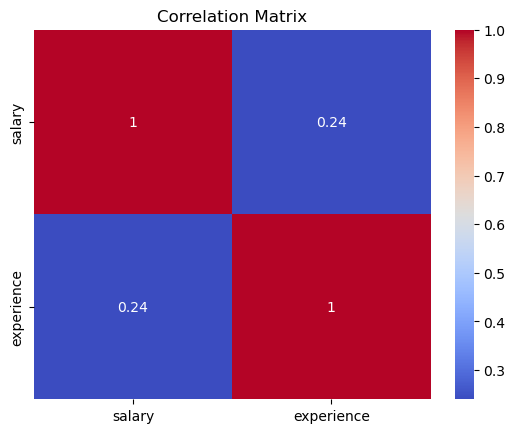

In [46]:
sns.heatmap(df[['salary', 'experience']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

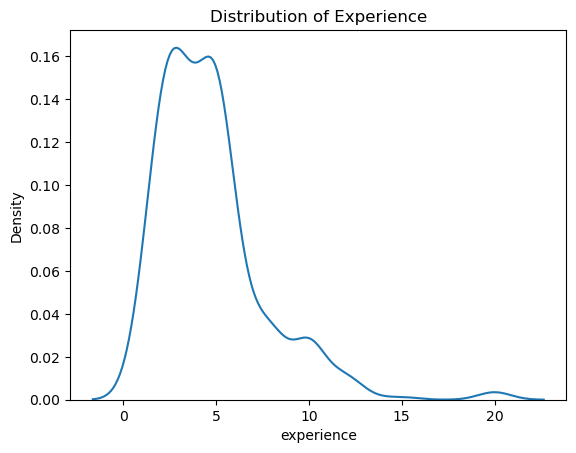

In [50]:
sns.kdeplot(data=df, x='experience')
plt.title('Distribution of Experience')
plt.show()

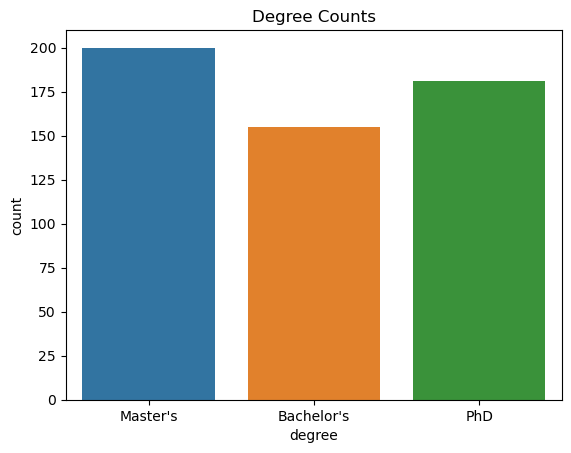

In [51]:
# create a bar plot of degree counts
sns.countplot(data=df, x='degree')
plt.title('Degree Counts')
plt.show()

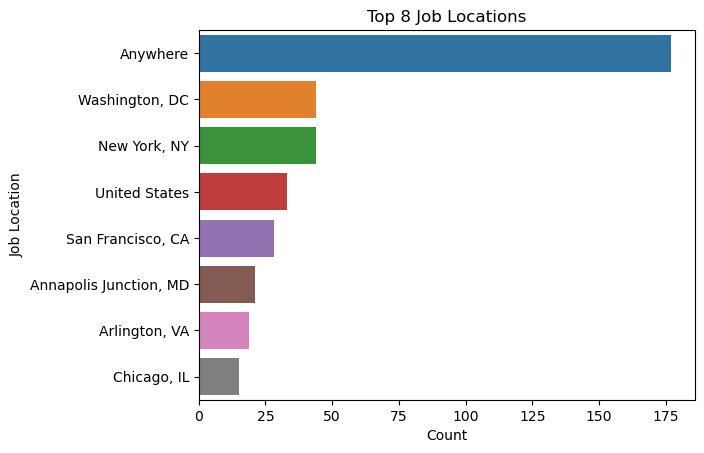

In [55]:
top_8_locations = df['location'].value_counts().head(8)

# create a bar plot of the job title counts
sns.barplot(x=top_8_locations, y=top_8_locations.index)
plt.title('Top 8 Job Locations')
plt.xlabel('Count')
plt.ylabel('Job Location')
plt.show()